<a href="https://colab.research.google.com/github/LakshmanGoel/YbIII/blob/main/atomic_postzeeman_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Atomic trajectory for 171Yb with horizontal velocity exciting the zeeman slower(vx) and gravity only.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Constants
g = 9.81  # m/s^2, standard gravity

In [4]:
# Trajectory function
def y_of_x(vx: float, x: np.ndarray) -> np.ndarray:
    """
    Vertical position y as a function of horizontal distance x for a projectile
    launched from y=0 with horizontal speed vx and zero vertical speed, under gravity.
    """
    if vx <= 0:
        raise ValueError("vx must be positive.")
    return -(g / (2.0 * vx**2)) * x**2

Sample y(x) values:
 x (cm)    y (cm)
    0.0 -0.000000
    0.1 -0.000491
    0.2 -0.001962
    0.3 -0.004415
    0.4 -0.007848
    0.5 -0.012263


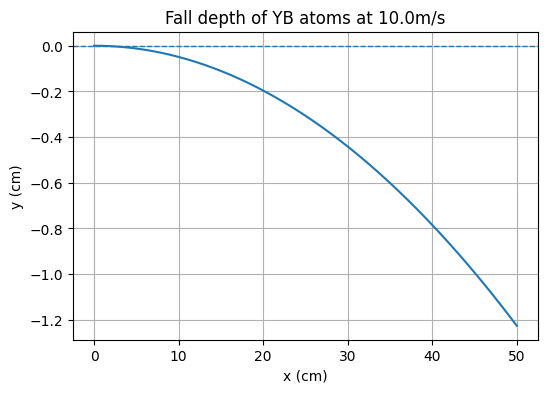

Formula used: y(x) = -(g/(2*vx^2)) * x^2  with g = 9.81 m/s^2


In [5]:
vx = 10.0    # m/s, speed of atoms leaving zeeman
x_max = 0.5   # meters to evaluate up to
dx = 0.00005    # resolution in meters

x = np.arange(0.0, x_max + dx, dx)    # m
y = y_of_x(vx, x)   # m

x_cm = x * 100.0    # cm
y_cm = y * 100.0    # cm

# Print a small table of a few points
sample_points = np.linspace(0, x_max, 6)
table = pd.DataFrame({
    "x (cm)": sample_points,
    "y (cm)": y_of_x(vx, sample_points)
})
print("Sample y(x) values:")
print(table.to_string(index=False))

# Plot y vs x
plt.figure(figsize=(6,4))
plt.plot(x_cm, y_cm)
plt.axhline(0.0, linestyle="--", linewidth=1)
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.title("Fall depth of YB atoms at " + str(vx) + "m/s")
plt.grid(True)
plt.show()

print("Formula used: y(x) = -(g/(2*vx^2)) * x^2  with g = 9.81 m/s^2")